In [9]:
import pandas as pd
# Correct file path using raw string
df = pd.read_csv(r"C:\Users\kanti\OneDrive\Documents\Customer_churn_analysis\dataset\Telco-Customer-Churn.csv")
# View first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Shape of the dataset
print("Shape:", df.shape)

# Data types and non-null counts
df.info()

# Total missing values per column
df.isnull().sum()

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Convert TotalCharges to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check again for missing values
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Drop rows with missing TotalCharges (if very few)
df = df.dropna()
df.shape


(7032, 21)

In [13]:
df = df.drop(['customerID'], axis=1)


In [14]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})


Matplotlib is building the font cache; this may take a moment.


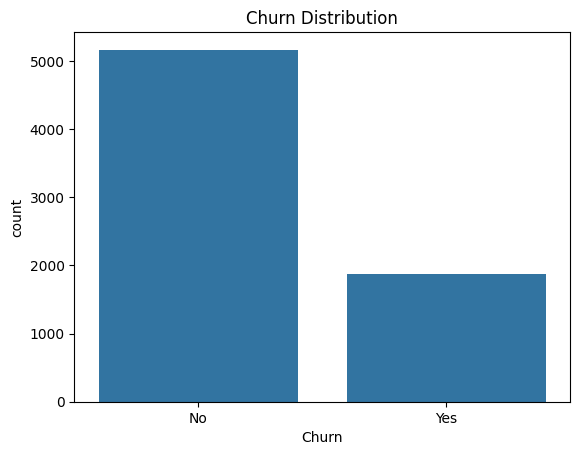

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


In [18]:
import os

# Create the folder if it doesn't exist
os.makedirs("visuals", exist_ok=True)


In [19]:
plt.savefig("visuals/churn_distribution.png")

<Figure size 640x480 with 0 Axes>

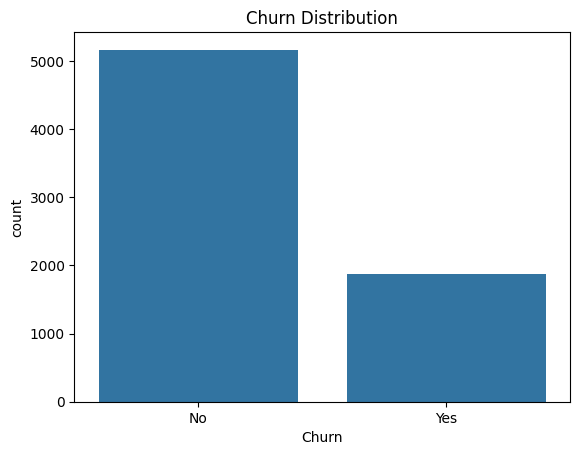

In [20]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create folder
os.makedirs("visuals", exist_ok=True)

# Plot and save
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.savefig("visuals/churn_distribution.png")
plt.show()


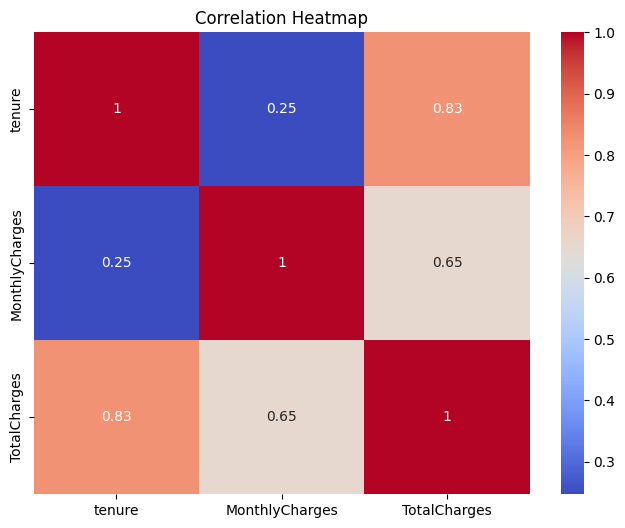

In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


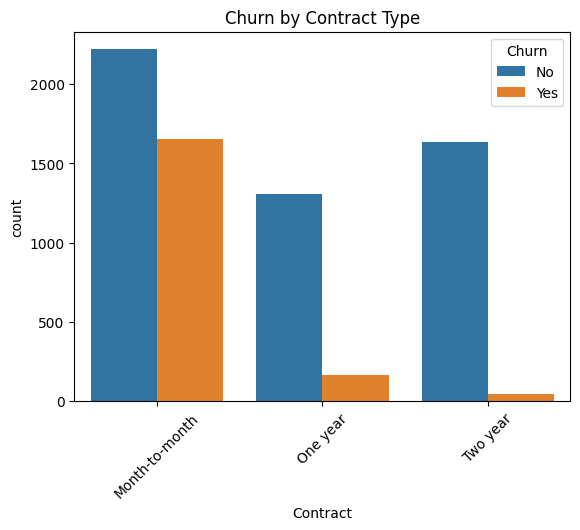

In [22]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Get list of all object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Remove 'Churn' from the list for now (we'll handle it separately)
cat_cols.remove('Churn')

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Encode 'Churn' as binary: Yes → 1, No → 0
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Check final shape
df_encoded.shape


(7032, 31)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Features and Target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Initialize and fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[914 119]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC Score: 0.7004221648177004
